In [12]:
#1) Load the dataset that is given to you
import pandas as pd

# Load dataset
df = pd.read_csv("loan_data.csv")
print("Step 1: Dataset loaded successfully.\n")
df.head()

Step 1: Dataset loaded successfully.



,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [14]:
# 2) Check for null values in the dataset
print("Step 2: Checking for null values...\n")
print(df.isnull().sum())

Step 2: Checking for null values...

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


In [16]:
#3) Print the percentage of default to a payer of the dataset for the TARGET column
default_percentage = df['not.fully.paid'].value_counts(normalize=True) * 100
print("Step 3: Percentage of defaults:\n")
print(default_percentage.round(2))

Step 3: Percentage of defaults:

not.fully.paid
0    83.99
1    16.01
Name: proportion, dtype: float64


In [18]:
#4) Balance the dataset if the data is imbalanced
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

# Encode categorical feature
X['purpose'] = LabelEncoder().fit_transform(X['purpose'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("Step 4: SMOTE applied. Class distribution after balancing:")
print(y_train_bal.value_counts())

Step 4: SMOTE applied. Class distribution after balancing:
not.fully.paid
0    6436
1    6436
Name: count, dtype: int64


C:\Users\Ferina\AppData\Local\Temp\ipykernel_1432\2781663013.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_bal, palette='Set2')


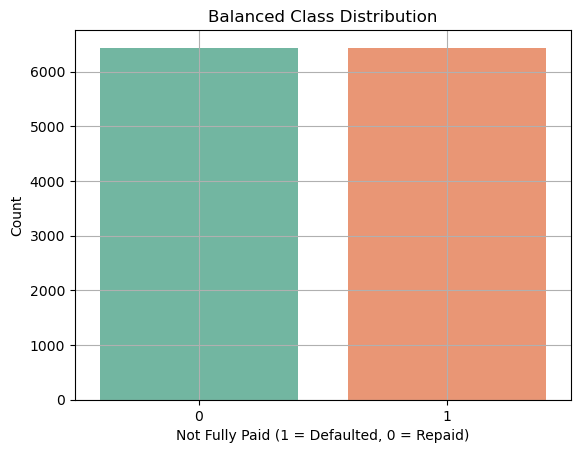

In [20]:
#5) Plot the balanced or imbalanced data
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_train_bal, palette='Set2')
plt.title("Balanced Class Distribution")
plt.xlabel("Not Fully Paid (1 = Defaulted, 0 = Repaid)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [22]:
#6) Encode the columns that are required for the model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_bal_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

print("Step 6: Data normalized using StandardScaler.")

Step 6: Data normalized using StandardScaler.


In [24]:
#7) Calculate sensitivity as a metric
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_bal_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Add recall metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])

print("Step 7: Model compiled with Recall metric.")

Step 7: Model compiled with Recall metric.


C:\Users\Ferina\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
#8) Calculate the area under the receiver operating characteristics curve
# Now include AUC too
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall', 'AUC'])

# Train the model
history = model.fit(X_train_bal_scaled, y_train_bal, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate
loss, recall, auc = model.evaluate(X_test_scaled, y_test)

print(f"\nStep 8: Model evaluated.")
print(f"Sensitivity (Recall): {recall:.2f}")
print(f"AUC Score: {auc:.2f}")

Epoch 1/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6745 - Recall: 0.2895 - loss: 0.6104 - val_AUC: 0.0000e+00 - val_Recall: 0.5138 - val_loss: 0.7513
Epoch 2/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7481 - Recall: 0.4303 - loss: 0.5661 - val_AUC: 0.0000e+00 - val_Recall: 0.5437 - val_loss: 0.6831
Epoch 3/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7641 - Recall: 0.4598 - loss: 0.5522 - val_AUC: 0.0000e+00 - val_Recall: 0.5779 - val_loss: 0.6669
Epoch 4/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7651 - Recall: 0.4574 - loss: 0.5500 - val_AUC: 0.0000e+00 - val_Recall: 0.5340 - val_loss: 0.7016
Epoch 5/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7750 - Recall: 0.4594 - loss: 0.5363 - val_AUC: 0.0000e+00 - val_Recall: 0.6027 - val_loss: 0.6408
Epoch 6/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.7784 - Recall: 0.4883 - loss: 0.5366 - val_AUC: 0.0000e+00 - val_Recall: 0.5798 - val_loss: 0.6662
Epoch 7/20
322/322 ━━━━━━━━━━━━━━━━━━━━ 